# Análisis de Clustering


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
import numpy as np
import pyclustertend 
import sklearn
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch

**Lectura del archivo**


In [3]:
df_pca = pd.read_csv('pca_resultados.csv')
print(df_pca.head())

             PC1           PC2          PC3           PC4          PC5  \
0   88055.430665 -31300.220912  3454.229085   9126.560635  6797.300332   
1   76642.582817 -27293.396781  2985.442695   8167.173063  5903.582443   
2   94376.076157 -33539.742107  3713.920410   9700.610671  7354.133876   
3   59051.415613 -20990.564879  2341.064856   6535.915068  4411.060605   
4  105659.315090 -37555.996401  4145.780902  10763.542244  8350.751015   

            PC6          PC7           PC8         PC9          PC10  \
0  16901.525492  2651.200159 -10122.247249  520.986183 -21098.418538   
1  14806.532365  2339.237854  -8635.524239  350.733722 -18325.651586   
2  18109.964458  2836.707950 -10841.613631  585.551458 -22606.176706   
3  11465.010401  1735.428711  -6895.582676  179.314255 -14322.792874   
4  20257.415686  3154.721473 -12033.651843  715.097937 -25258.670634   

          PC11          PC12          PC13         PC14          PC15  Id  \
0  6589.802849 -12390.954523 -11926.719510  7

**Cantidad de observaciones**


In [4]:
print(f'Total de observaciones: {df_pca.shape[0]}')

Total de observaciones: 1460


**Estadístico de Hopkins**


In [8]:
X = df_pca.drop(columns=['Id', 'SalePrice']).values

X_scale = sklearn.preprocessing.scale(X)

random.seed(123)
hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))
print(f'Estadística de Hopkins: {hopkins_stat:.4f}')

if hopkins_stat == 0.5:
    print("No hay tendencia clara a formar clusters.")
else:
    print("Hay fuerte tendencia a formar clusters.")

Estadística de Hopkins: 0.0063
Hay fuerte tendencia a formar clusters.


### Número de k clusters


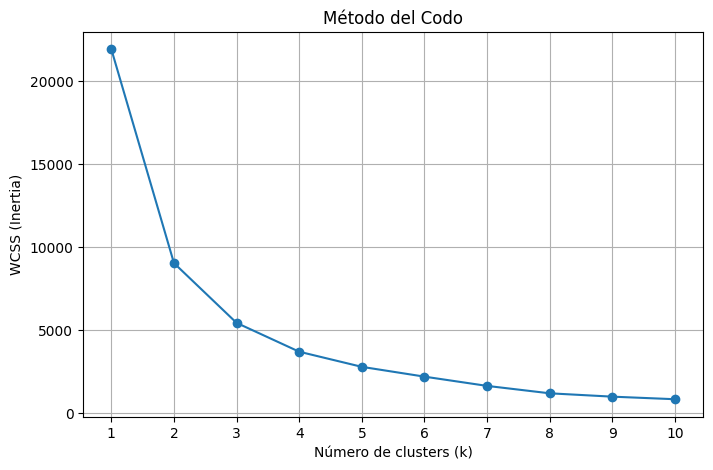

In [11]:
wcss = []
numeroClusters = range(1, 11)

for k in numeroClusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scale)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(numeroClusters, wcss, marker='o')
plt.xticks(numeroClusters)
plt.xlabel("Número de clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Método del Codo")
plt.grid(True)
plt.show()

### K-means


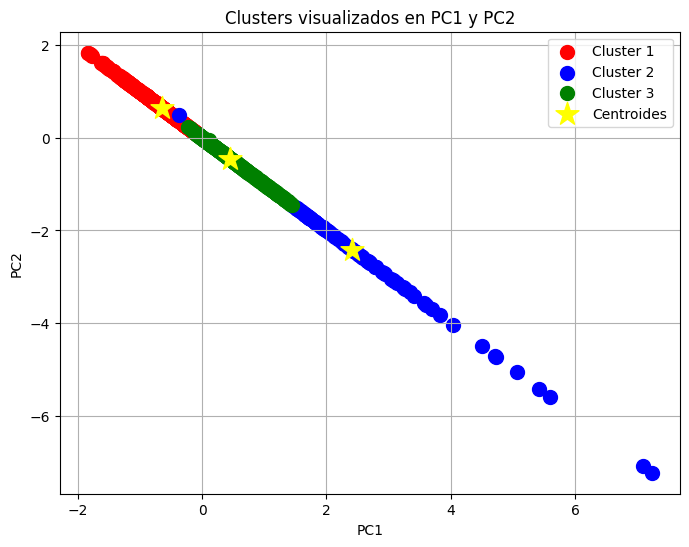

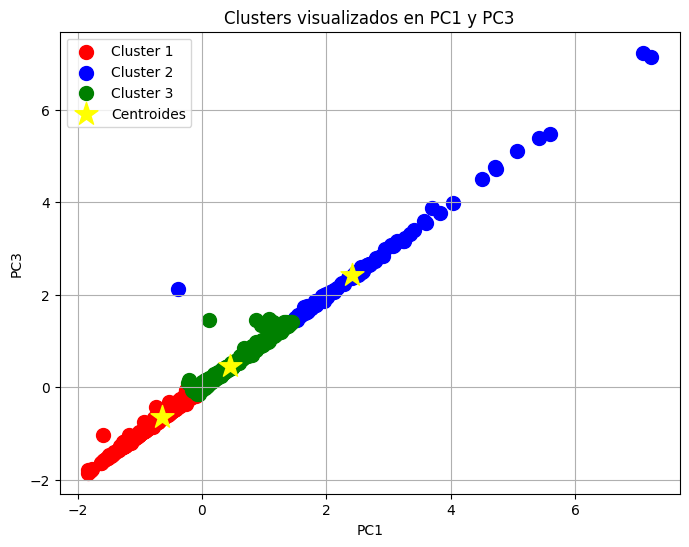

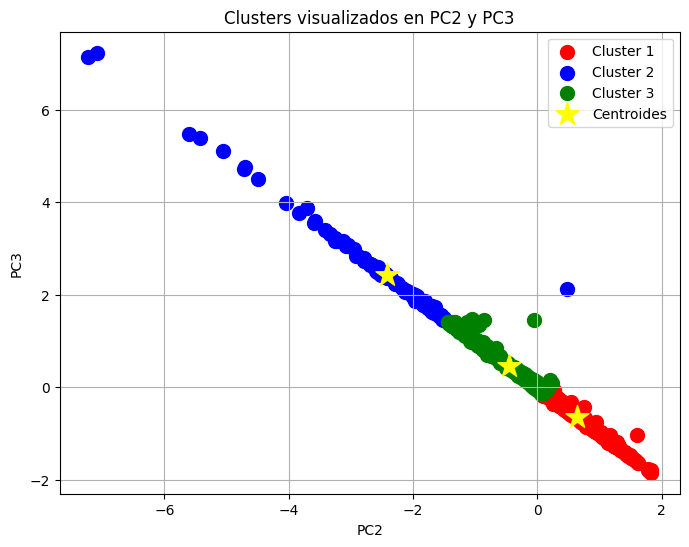

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scale)

df_pca['Cluster'] = clusters

# === PC1 vs PC2 ===
plt.figure(figsize=(8,6))
plt.scatter(X_scale[clusters == 0, 0], X_scale[clusters == 0, 1], s=100, c='red', label="Cluster 1")
plt.scatter(X_scale[clusters == 1, 0], X_scale[clusters == 1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(X_scale[clusters == 2, 0], X_scale[clusters == 2, 1], s=100, c='green', label="Cluster 3")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="yellow", marker="*", label="Centroides")

plt.title("Clusters visualizados en PC1 y PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

# === PC1 vs PC3 ===
plt.figure(figsize=(8,6))
plt.scatter(X_scale[clusters == 0, 0], X_scale[clusters == 0, 2], s=100, c='red', label="Cluster 1")
plt.scatter(X_scale[clusters == 1, 0], X_scale[clusters == 1, 2], s=100, c='blue', label="Cluster 2")
plt.scatter(X_scale[clusters == 2, 0], X_scale[clusters == 2, 2], s=100, c='green', label="Cluster 3")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s=300, c="yellow", marker="*", label="Centroides")

plt.title("Clusters visualizados en PC1 y PC3")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.legend()
plt.grid(True)
plt.show()

# === PC2 vs PC3 ===
plt.figure(figsize=(8,6))
plt.scatter(X_scale[clusters == 0, 1], X_scale[clusters == 0, 2], s=100, c='red', label="Cluster 1")
plt.scatter(X_scale[clusters == 1, 1], X_scale[clusters == 1, 2], s=100, c='blue', label="Cluster 2")
plt.scatter(X_scale[clusters == 2, 1], X_scale[clusters == 2, 2], s=100, c='green', label="Cluster 3")

plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=300, c="yellow", marker="*", label="Centroides")

plt.title("Clusters visualizados en PC2 y PC3")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.legend()
plt.grid(True)
plt.show()

### Clustering Jerárquico


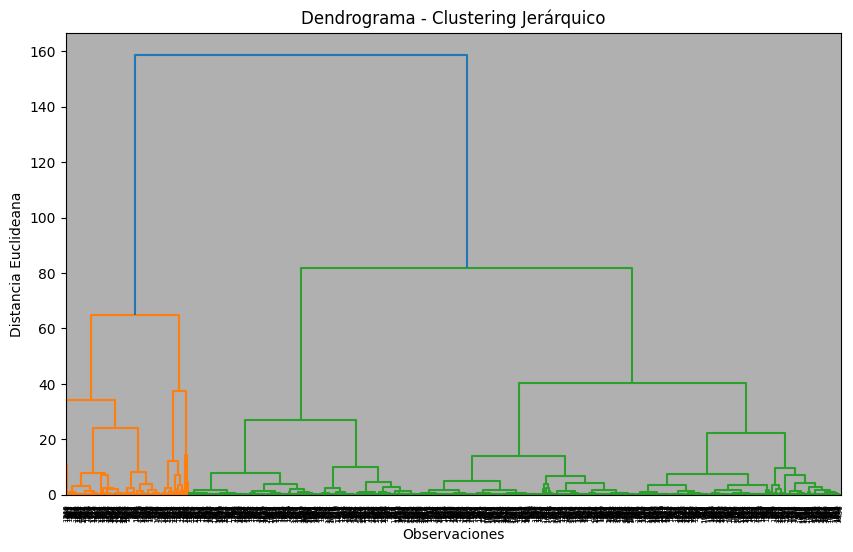

In [15]:
plt.figure(figsize=(10,6))
dendrograma = sch.dendrogram(sch.linkage(X_scale, method='ward'))
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Observaciones")
plt.ylabel("Distancia Euclideana")
plt.grid(True)
plt.show()

#### Conclusión final de análisis de agrupamiento aplicado a InmoValor S.A

<small>

En el marco de la consultoría para **InmoValor S.A.**, el análisis de clustering aplicado sobre el conjunto de datos *"House Prices: Advanced Regression Techniques"* permitió identificar patrones clave dentro de las propiedades analizadas. A través de la reducción de dimensionalidad mediante **Análisis de Componentes Principales (PCA)**, logramos sintetizar la información de 36 variables originales en **15 componentes principales**, las cuales explican aproximadamente el **89% de la varianza total**. Esto permitió conservar la mayor parte de la información relevante, eliminando redundancias o problemas de colinealidad.

### Evaluación de la tendencia a formar clusters

La aplicación de la **estadística de Hopkins** arrojó un valor de **0.0063**, lo que indica una **fuerte tendencia natural a formar agrupaciones** dentro del dataset. Esto justificó la implementación de técnicas de clustering para segmentar las propiedades en grupos homogéneos. Dicha segmentación es esencial para InmoValor, ya que permite **identificar diferentes perfiles de propiedades** y asociar cada grupo a segmentos específicos de mercado o rangos de precio.

### Determinación del número óptimo de clusters

Aplicando el **Método del Codo**, identificamos que el número óptimo de clusters es **3**, ya que en ese punto la ganancia adicional en la varianza explicada comienza a disminuir significativamente. Este hallazgo es consistente con la lógica del mercado inmobiliario, donde suelen existir tres segmentos principales:

- **Viviendas económicas o de interés social**.
- **Viviendas de gama media, con mejores acabados y ubicación**.
- **Propiedades premium o de lujo, con mayores amenidades y valor agregado**.

### Resultados del clustering y visualización

Al aplicar **K-means** sobre los 15 componentes principales, se segmentaron las propiedades en **3 clusters bien diferenciados**. Posteriormente, al proyectar los resultados en los planos definidos por las combinaciones de **PC1, PC2 y PC3**, se confirmó que los clusters son **visualmente distinguibles**, lo cual valida que las variables seleccionadas y transformadas capturan diferencias significativas entre los tipos de propiedades.

### Justificación de la visualización con PC1, PC2 y PC3

Para la visualización de los resultados del clustering, se optó por representar los grupos utilizando las **tres primeras componentes principales**: **PC1, PC2 y PC3**. Esta decisión se basa en que estas componentes explican en conjunto aproximadamente el **35.35% de la varianza total** del dataset, lo que las convierte en las dimensiones más relevantes y representativas de la estructura general de los datos.

Además, como se muestra en la siguiente tabla, estas primeras componentes tienen una **interpretación clara y relevante** en el contexto inmobiliario:

| Componente | Variables más relevantes                       | Interpretación                                                                                                      |
| ---------- | ---------------------------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| **PC1**    | OverallQual, FullBath, TotRmsAbvGrd, SalePrice | Representa la **calidad general, tamaño y valor económico** de las casas. Es el componente más importante.          |
| **PC2**    | BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd       | Relacionado con la **distribución interna** (cantidad de habitaciones y cocinas).                                   |
| **PC3**    | OverallCond, ScreenPorch, PoolArea             | Explica la **condición general y la presencia de amenidades exteriores** (porches y piscina).                       |

### ¿Por qué no se grafican todas las combinaciones posibles?

Si bien se seleccionaron 15 componentes principales para conservar el 89% de la varianza total, **no es práctico ni recomendable graficar todas las combinaciones posibles entre ellas (PC4 vs PC5, PC6 vs PC7, etc.)**. Esto se debe a:

- Las primeras componentes (PC1, PC2 y PC3) son las que **contienen más información relevante**.
- Visualizar más componentes a la vez **no agrega valor significativo**, ya que las componentes restantes explican patrones menores o ruido.
- En la práctica, los análisis visuales de clustering suelen enfocarse en las primeras dimensiones para facilitar la interpretación gráfica.

Por lo tanto, las combinaciones seleccionadas para la visualización fueron:
- **PC1 vs PC2**
- **PC1 vs PC3**
- **PC2 vs PC3**

Estas son las combinaciones que mejor capturan la **estructura general** de los datos y permiten observar cómo se separan los grupos, facilitando la interpretación de los clusters detectados.

### Interpretación de los clusters

| Cluster | Características Generales |
|---|---|
| **Cluster 1** | Propiedades de alta calidad, con más habitaciones, baños y un mayor precio final. Representa el segmento premium. |
| **Cluster 2** | Propiedades de calidad media, con distribución equilibrada de espacios y precios moderados. Representa el segmento medio. |
| **Cluster 3** | Propiedades más económicas, con menor calidad constructiva, menos habitaciones y menos amenidades. Representa el segmento económico. |

### Aporte a la consultoría y toma de decisiones estratégicas

Este análisis de clustering aporta **información estratégica clave** para InmoValor S.A., ya que permite:

- Definir **estrategias de marketing personalizadas** para cada segmento de propiedades.
- Ofrecer **valoraciones más precisas**, incorporando el cluster al que pertenece cada propiedad como un factor adicional.
- Optimizar los **modelos predictivos de precios**, al considerar el cluster como una variable categórica, mejorando la precisión de las estimaciones.
- Identificar **nichos de mercado subatendidos** o clusters con características poco aprovechadas, lo cual facilita la toma de decisiones sobre futuras inversiones o desarrollos inmobiliarios.

En conclusión, la combinación de **PCA y clustering** permitió convertir un dataset extenso y complejo en información clara y accionable, posicionando a InmoValor como una empresa innovadora y basada en datos, capaz de adaptarse dinámicamente a las condiciones del mercado inmobiliario y ofrecer **valoraciones ajustadas al contexto real de cada segmento de propiedades**.

</small>